In [118]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import json
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
from liquipediapy import dota

dota_obj = dota('ti10fantasy (yalu491@gmail.com)')

In [3]:
url = "https://liquipedia.net/dota2/The_International/2021"

response = requests.get(url)
soup = BeautifulSoup(response.text)

team_cards = soup.find_all("div", {"class": "teamcard toggle-area toggle-area-1"})

In [5]:
def get_players(players_table):
    links = []
    for tr in players_table.findAll("tr"):
        trs = tr.findAll("td")
        for each in trs:
            try:
                link = each.find_all('a')
                link = [x for x in link if x.find('img') == None]
                link = link[0]['href']
                links.append(link)
            except:
                pass
    return links

In [7]:
cols = ["Team", "Position", "Link"]

df = pd.DataFrame(columns=cols)
pos_list = range(1, 6)

for team_card in team_cards:
    team = team_card.find('center').text
    players_table = team_card.find('table', {"class": "wikitable wikitable-bordered list"})
    links = get_players(players_table)[:5]
    temp_df = pd.DataFrame([[team]*5, pos_list, links], index = cols).T
    df = df.append(temp_df, ignore_index=True)

In [8]:
df['Player Name'] = df['Link'].str.split('/').str[-1]

In [9]:
json_data = []
for index, row in df.iterrows():
    print('\r' + str(index), end = '')
    
    url = 'https://liquipedia.net' + row['Link']
    response = requests.get(url)
    soup = BeautifulSoup(response.text)

    links = soup.find("div", {"class": "infobox-center infobox-icons"})
    json_data.append(links)
    
    time.sleep(random.uniform(1, 3))

89

In [51]:
links = []

dotabuffs = []
for item in json_data:
    sublist = []
    for a in item.find_all('a'):
        sublist.append(a['href'])
        if 'dotabuff' in a['href']:
            dotabuffs.append(a['href'])
    links.append(sublist)

In [57]:
df['Links'] = links
df['Dotabuff'] = dotabuffs
df['Player ID'] = df['Dotabuff'].str.split('/').str[-1]

In [58]:
df

,Team,Position,Link,Player Name,Links,Dotabuff,Player ID
0,Evil Geniuses,1,/dota2/Arteezy,Arteezy,[https://www.dotabuff.com/esports/players/8674...,https://www.dotabuff.com/esports/players/86745912,86745912
1,Evil Geniuses,2,/dota2/Abed,Abed,[https://web.archive.org/web/http://abedyusop....,https://www.dotabuff.com/esports/players/15471...,154715080
2,Evil Geniuses,3,/dota2/Iceiceice,Iceiceice,[https://www.dotabuff.com/esports/players/8477...,https://www.dotabuff.com/esports/players/84772440,84772440
3,Evil Geniuses,4,/dota2/Cr1t-,Cr1t-,[https://www.dotabuff.com/esports/players/2590...,https://www.dotabuff.com/esports/players/25907144,25907144
4,Evil Geniuses,5,/dota2/Fly,Fly,"[https://www.talflyaizik.com/, https://www.dot...",https://www.dotabuff.com/esports/players/94155156,94155156
...,...,...,...,...,...,...,...
85,Fnatic,1,/dota2/Raven,Raven,[https://www.dotabuff.com/esports/players/1323...,https://www.dotabuff.com/esports/players/13230...,132309493
86,Fnatic,2,/dota2/ChYuan,ChYuan,[https://www.dotabuff.com/esports/players/1134...,https://www.dotabuff.com/esports/players/11343...,113435203
87,Fnatic,3,/dota2/Deth,Deth,[https://www.dotabuff.com/esports/players/9998...,https://www.dotabuff.com/esports/players/99983413,99983413
88,Fnatic,4,/dota2/Jabz,Jabz,[https://www.dotabuff.com/esports/players/1004...,https://www.dotabuff.com/esports/players/10047...,100471531


In [160]:
match_histories = []
for index, row in df.iterrows():
    print('\r' + str(index), end = '')
    
    account_id = row['Player ID']
    url = f"https://api.opendota.com/api/players/{account_id}/matches?date=365"
    response = requests.get(url)
    soup = BeautifulSoup(response.text)

    json_data = json.loads(response.text)
    match_histories.append(json_data)
    time.sleep(1)

89

In [164]:
matches = defaultdict(list)
for player, entries in zip(df['Player ID'], match_histories):
    for match in entries:
        if match['lobby_type'] == 1 or match['lobby_type'] == 2:
            matches[match['match_id']].append(player)

In [165]:
with open("matches_year_pro.json", 'w') as outfile:
    json.dump(matches, outfile)

In [168]:
matches

defaultdict(list,
            {6040802788: ['86745912',
              '154715080',
              '84772440',
              '25907144',
              '94155156',
              '173978074',
              '118134220',
              '157475523',
              '111114687'],
             6040722034: ['86745912',
              '154715080',
              '84772440',
              '25907144',
              '94155156',
              '173978074',
              '118134220',
              '157475523',
              '111114687'],
             6040639859: ['86745912',
              '154715080',
              '84772440',
              '25907144',
              '94155156',
              '173978074',
              '118134220',
              '157475523',
              '111114687'],
             6040431300: ['86745912',
              '154715080',
              '84772440',
              '25907144',
              '94155156',
              '375507918',
              '94281932',
              '184950344',
   

In [192]:
matches_df = pd.DataFrame()
rows = []
i = 0
for k, v in matches.items():
    match_id = k
    url = f"https://api.opendota.com/api/matches/{match_id}"
    response = requests.get(url)
    json_data = json.loads(response.text)
    row = {
        'Match ID': k,
        'Duration': json_data['duration'],
        'Game Mode': json_data['game_mode'],
        'League ID': json_data['leagueid'],
        'Lobby Type': json_data['lobby_type'],
        'Start Time': json_data['start_time'],
        }
    for player in json_data['players']:
        #if str(player['account_id']) in v:
        player_row = row.copy()
        player_row.update({
            'Player ID': player['account_id'],
            'Radiant': player['isRadiant'],
            'Win': player['win'],
            'Abandons': player['abandons'],
            'Kills': player['kills'],
            'Deaths': player['deaths'],
            'Last Hits': player['last_hits'],
            'Denies': player['denies'],
            'GPM': player['gold_per_min'],
            'Towers': player['towers_killed'],
            'Teamfight Participation': player['teamfight_participation'],
            'Obs Placed': player['obs_placed'],
            'Camps Stacked': player['camps_stacked'],
            'Rune Pickups': player['rune_pickups'],
            'First Blood': player['firstblood_claimed'],
            'Stun Duration': player['stuns'],
        })
        try:
            player_row.update({'Roshan Kills': player['roshan_kills']})
        except:
            player_row.update({'Roshan Kills': player['roshans_killed']})
        rows.append(player_row)
    time.sleep(1)
    print(f'\r{str(i)}', end='')
    i+=1

3179

In [194]:
matches_df = pd.DataFrame(rows)

In [196]:
matches_df.to_csv('matches_year_pro.csv', index=False)

In [226]:
df['Player ID'] = df['Player ID'].astype(int)
matches_df = matches_df.dropna()

grouped_matches = matches_df.groupby(['Player ID']).mean()

In [291]:
matches_df

,Match ID,Duration,Game Mode,League ID,Lobby Type,Start Time,Player ID,Radiant,Win,Abandons,...,Denies,GPM,Towers,Teamfight Participation,Obs Placed,Camps Stacked,Rune Pickups,First Blood,Stun Duration,Roshan Kills
0,6040802788,2170,2,12964,1,1623619081,898754153,True,1,0,...,7.0,726.0,3.0,0.730769,0.0,0.0,1.0,0.0,72.229740,1.0
1,6040802788,2170,2,12964,1,1623619081,173978074,True,1,0,...,10.0,588.0,2.0,0.846154,1.0,1.0,10.0,0.0,7.549805,0.0
2,6040802788,2170,2,12964,1,1623619081,118134220,True,1,0,...,8.0,532.0,1.0,0.807692,0.0,3.0,3.0,1.0,0.000000,0.0
3,6040802788,2170,2,12964,1,1623619081,157475523,True,1,0,...,2.0,340.0,0.0,0.923077,5.0,1.0,3.0,0.0,36.861610,0.0
4,6040802788,2170,2,12964,1,1623619081,111114687,True,1,0,...,1.0,250.0,0.0,0.346154,11.0,3.0,1.0,0.0,20.620605,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31793,5659869780,2407,2,4122,1,1602907630,1011457057,False,0,0,...,3.0,450.0,0.0,0.888889,2.0,1.0,1.0,0.0,9.177950,0.0
31794,5659869780,2407,2,4122,1,1602907630,318371533,False,0,0,...,3.0,268.0,0.0,0.666667,2.0,3.0,6.0,0.0,54.448486,0.0
31795,5659869780,2407,2,4122,1,1602907630,318286721,False,0,0,...,12.0,426.0,2.0,0.722222,1.0,7.0,4.0,0.0,0.000000,0.0
31796,5659869780,2407,2,4122,1,1602907630,160708663,False,0,0,...,2.0,274.0,0.0,0.833333,14.0,5.0,5.0,0.0,6.321533,0.0


In [260]:
averages = df.join(grouped_matches, on="Player ID", how = "left").drop(
    ['Link', 'Links', 'Dotabuff', 'Match ID', 'Duration',\
    'Game Mode', 'Lobby Type', 'League ID', 'Start Time',\
    'Radiant', 'Abandons'], axis=1)
averages['Creep Score'] = averages['Last Hits'] + averages['Denies']
averages.drop(['Last Hits', 'Denies'], inplace=True, axis=1)

<AxesSubplot:>

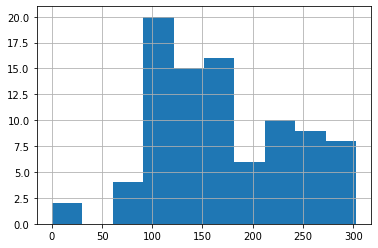

In [304]:
df.merge(matches_df, on="Player ID",how = 'left').groupby('Player Name').count()['Kills'].hist()

In [248]:
def fantasy_score(row):
    score = .3 * row['Kills'] +\
        3 - .3 * row['Deaths'] +\
        .003 * (row['Creep Score']) +\
        .002 * row['GPM'] +\
        row['Towers'] +\
        3 * row['Teamfight Participation'] +\
        0.5 * row['Obs Placed'] +\
        0.5 * row['Camps Stacked'] +\
        0.25 * row['Rune Pickups'] +\
        4 * row['First Blood'] +\
        0.05 * row['Stun Duration'] +\
        row['Roshan Kills']
    return score

In [267]:
weighted = averages.copy()

In [268]:
weighted['Kills'] = .33 * averages['Kills']
weighted['Deaths'] = 3 - .3 * averages['Deaths']
weighted['Creep Score'] = .003 * averages['Creep Score']
weighted['GPM'] = .002 * averages['GPM']
weighted['Towers'] = averages['Towers']
weighted['Teamfight Participation'] = 3 * averages['Teamfight Participation']
weighted['Obs Placed'] = .5 * averages['Obs Placed']
weighted['Camps Stacked'] = .5 * averages['Camps Stacked']
weighted['Rune Pickups'] = .25 * averages['Rune Pickups']
weighted['First Blood'] = 4 * averages['First Blood']
weighted['Stun Duration'] = 0.05 * averages['Stun Duration']
weighted['Roshan Kills'] = averages['Roshan Kills']

Text(0.5, 1.0, 'Pos 1 Players Fantasy Point Sources')

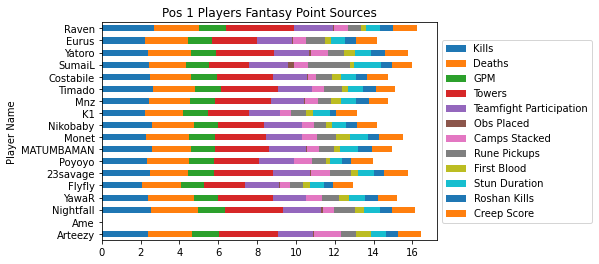

In [285]:
weighted[weighted['Position'] == 1].drop(['Player ID', 'Win', 'Position', 'Team'], axis=1).plot(x = 'Player Name', kind='barh', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Pos 1 Players Fantasy Point Sources')

In [98]:
def compute_fantasy(player):
    k = player['kills']
    d = player['deaths']
    lh = player['last_hits']
    dn = player['denies']
    gpm = player['gold_per_min']
    towers = player['towers_killed']
    rosh = player['roshan_kills']
    participation = player['teamfight_participation']
    obs = player['obs_placed']
    stacks = player['camps_stacked']
    runes = player['rune_pickups']
    fb = player['firstblood_claimed']
    stuns = player['stuns']

    score = .3 * k +\
        3 - .3 * d +\
        .003 * (lh+dn) +\
        .002 * gpm +\
        towers +\
        rosh +\
        3 * participation +\
        0.5 * obs +\
        0.5 * stacks +\
        0.25 * runes +\
        4 * fb +\
        0.05 * stuns

    return score

In [99]:
for player in json['players']:
    print(compute_fantasy(player))

8.969
13.804
7.654980955000001
11.232971599999999
14.354719000000001
9.49844788
8.314959714999999
13.70859841
7.797057199999999
10.580368150000002


In [97]:
json['players'][0]['observer_uses']

1